# The following is the skeleton code for DynBandit env

In [4]:
# Gym Template for DynBandit Env Prepared by Kui Wu
# Since we do not publish the DynBandit Env, no need to register for it to Gym. 

import numpy as np 
import matplotlib.pyplot as plt
import time
import gym
import random

from gym import Env, spaces

class DynBandit(Env):
    def __init__(self):
        # Define the observation space, there are five arms, each having two possible state.
        self.observation_space = spaces.Tuple((spaces.Discrete(2), spaces.Discrete(2), spaces.Discrete(2),
                spaces.Discrete(2), spaces.Discrete(2)))
          
        # Define an action space ranging from 0 to 4, 0: the first arm, ... 4: the fifth arm
        self.action_space = spaces.Discrete(5)
        
        # STUDENT CODE HERE
        # initialization with the given parameters specified in Assignment 1. Hard-coding the parameters here is fine
        self.state = np.zeros((5,), dtype=int)
              
        
    def reset(self):
        # STUDENT CODE HERE   
        # An episode is over, initialization for running next episode
        ## Important note: for each new episode, you must reset the random seed to a different value. 
        ## Otherwise, your episodes are not independent. This is a common error in statistical inference-based learning. 
        ## For example, you can use np.random.seed(time.time()) to avoid the problem. 
        np.random.seed(seed=int(time.time())) 
        self.state = np.zeros((5,), dtype=int)
        
    def _get_obs(self):
        pass # We assume the bandit does not disclose state information. 
    
    def mdpState(self, state):
        mdp = np.array([[0.6, 0.4], [0.4, 0.6]])
        S = np.array([0, 1])
        
        if state == 0:
            state = np.random.choice(S, p = mdp[0])
        else:
            state = np.random.choice(S, p = mdp[1])

        return state
    
    def step(self, action):
        done = False
        # Assert that it is a valid action 
        assert self.action_space.contains(action), "Invalid Action"
        
        # STUDENT CODE HERE: 
        # apply the action, generate the corresponding reward, and update the state of the arm.    
        
        if action == 0:
            if self.state[action] == 0:
                reward=np.random.normal(2, scale= np.sqrt(1)) # arm0: reward= ... #state update following its MDP
            else:
                reward=np.random.normal(0, scale= np.sqrt(1))
            self.state[action] = self.mdpState(self.state[action])
        elif action == 1:
            if self.state[action] == 0:
                reward=np.random.normal(4, scale= np.sqrt(1)) # arm0: reward= ... #state update following its MDP
            else:
                reward=np.random.normal(1, scale= np.sqrt(1))
            self.state[action] = self.mdpState(self.state[action])
        elif action == 2:
            if self.state[action] == 0:
                reward=np.random.normal(6, scale= np.sqrt(1)) # arm0: reward= ... #state update following its MDP
            else:
                reward=np.random.normal(2, scale= np.sqrt(1))
            self.state[action] = self.mdpState(self.state[action])
        elif action == 3:
            if self.state[action] == 0:
                reward=np.random.normal(8, scale= np.sqrt(1)) # arm0: reward= ... #state update following its MDP
            else:
                reward=np.random.normal(3, scale= np.sqrt(1))
            self.state[action] = self.mdpState(self.state[action])
        elif action == 4:
            if self.state[action] == 0:
                reward=np.random.normal(10, scale= np.sqrt(1)) # arm0: reward= ... #state update following its MDP
            else:
                reward=np.random.normal(1, scale= np.sqrt(1))
            self.state[action] = self.mdpState(self.state[action])
        
        return [], reward, done, []
                    
        

# The following is the template code of RL agent: 


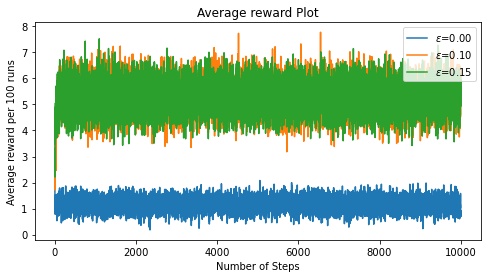

In [5]:
#Dynbandit RL agent, Template prepared by Kui Wu
# STUDENT CODE: FOLLOW THE TEMPLATE AND IMPLEMENT THE REQUIRED POLICY IN RL AGENT
# For simplicity, we do not write separate test code 

def RLAgent(env, epsilon=0, steps=10000): 
    
    n_actions = env.action_space.n
    feedback = np.zeros((steps, 2))
    
    avg_act_reward = np.zeros(n_actions)
    act_cnt = np.zeros(n_actions) 
    
    for step in range(steps):
            # Take a random action. 
        if np.random.random() < epsilon:
            action = np.random.randint(n_actions)
        else:
            action = np.argmax(avg_act_reward)

        # Note that You will need to replace the random policy with your implementation for other policies, i.e., greedy, and \epsilon-greedy.
        # write the code for other policies in the RL agent rather than the gym environment. 
            
        obs, reward, done, info = env.step(action) 
        #print(action, reward) # print action, reward for TA to check if your reward function has been implemented correctly. 
        
        # Record reward, store historical rewards for calculation
        feedback[step, :] = [action, reward]
            
        act_cnt[action] += 1
        avg_act_reward[action] += (reward - avg_act_reward[action])/act_cnt[action]
        # reach 10000 steps. the end of this episode    

    return feedback

if __name__ == '__main__':    
    env = DynBandit()
    
    reward_plot = np.zeros(10000)
    steps = 10000
    runs = 100
    plt.figure(figsize=(8,4))
    for eps in [0, 0.1, 0.15]:        
        for run in range(runs):
            env.reset()
            feedback = RLAgent(env, eps, steps)

        # Record reward, store historical rewards for calculation
            reward_plot += feedback[:, 1]
            
    #calculate the final statistical result     
        reward_plot /= runs
    # plot the final result by averaging the 100 episodes
        plt.plot(reward_plot, label=r"$\epsilon$={:.2f}".format(eps))
    
    plt.title("Average reward Plot")
    plt.xlabel("Number of Steps")
    plt.ylabel("Average reward per 100 runs")
    plt.legend()
    env.close()